In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\workspace\smart energy\usecase\energy_consumtion_prediction\prediction_machinelearning_dataset\energy_consumption_data.csv")

In [3]:
df.head()

,timestamp,energy_consumption,building_id,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday
0,2020-01-01 00:00:00,5.8438,1.0,18.2083,20.0417,9.4000,50.2833,8.7933,159.6167,1,1,0,2,library,0,summer,1.0
1,2020-01-01 01:00:00,7.5312,1.0,17.2317,19.0067,9.0683,52.5000,8.1167,157.8667,1,1,1,2,library,0,summer,1.0
2,2020-01-01 02:00:00,7.5312,1.0,16.9167,18.9767,8.9700,52.2833,9.4600,152.4000,1,1,2,2,library,0,summer,1.0
3,2020-01-01 03:00:00,8.0625,1.0,15.7317,17.5467,8.5250,55.4167,7.5700,183.2000,1,1,3,2,library,0,summer,1.0
4,2020-01-01 04:00:00,7.6250,1.0,15.0667,16.4633,8.7233,60.1000,5.6700,190.9500,1,1,4,2,library,0,summer,1.0


In [4]:
# checking for null values in dataset
df.isnull().sum()

timestamp                 0
energy_consumption        0
building_id               0
apparent_temperature     99
air_temperature          99
dew_point_temperature    99
relative_humidity        99
wind_speed               99
wind_direction           99
month                     0
day                       0
hour                      0
weekday                   0
building_category         0
is_weekend                0
season                    0
is_holiday                0
dtype: int64

In [5]:
#checking the shape of dataframe which has 1 year hourly data and 19 column.
df.shape

(79056, 17)

In [6]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79056 entries, 0 to 79055
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              79056 non-null  object 
 1   energy_consumption     79056 non-null  float64
 2   building_id            79056 non-null  float64
 3   apparent_temperature   78957 non-null  float64
 4   air_temperature        78957 non-null  float64
 5   dew_point_temperature  78957 non-null  float64
 6   relative_humidity      78957 non-null  float64
 7   wind_speed             78957 non-null  float64
 8   wind_direction         78957 non-null  float64
 9   month                  79056 non-null  int64  
 10  day                    79056 non-null  int64  
 11  hour                   79056 non-null  int64  
 12  weekday                79056 non-null  int64  
 13  building_category      79056 non-null  object 
 14  is_weekend             79056 non-null  int64  
 15  se

In [7]:
# checking the datatype of each columns
df.describe()

,energy_consumption,building_id,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,is_weekend,is_holiday
count,79056.000000,79056.000000,78957.000000,78957.000000,78957.000000,78957.000000,78957.000000,78957.000000,79056.000000,79056.000000,79056.00000,79056.000000,79056.000000,79056.000000
mean,15.089880,5.000000,13.792473,15.587136,9.011858,71.434345,8.869911,173.646959,6.513661,15.756831,11.50000,2.997268,0.284153,0.002732
std,20.483902,2.582005,7.942480,7.874472,4.321807,24.758121,7.207867,87.842718,3.451256,8.811585,6.92223,1.995224,0.451013,0.052200
min,0.000000,1.000000,-4.081700,-1.378300,-9.681700,3.616700,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2.794000,3.000000,7.671700,9.616700,6.085000,52.950000,2.750000,106.200000,4.000000,8.000000,5.75000,1.000000,0.000000,0.000000
50%,7.360000,5.000000,13.186700,14.868300,8.723300,75.566700,7.783300,151.216700,7.000000,16.000000,11.50000,3.000000,0.000000,0.000000
75%,16.323500,7.000000,19.400000,20.810000,11.775000,94.866700,13.360000,260.816700,10.000000,23.000000,17.25000,5.000000,1.000000,0.000000
max,144.614200,9.000000,39.941700,45.208300,22.368300,100.000000,42.561700,358.000000,12.000000,31.000000,23.00000,6.000000,1.000000,1.000000


In [8]:
df.describe(include="O")

,timestamp,building_category,season
count,79056,79056,79056
unique,8784,5,4
top,2020-01-01 00:00:00,teaching,autumn
freq,9,35136,19872


# Check for outliers

### Energy_Consumption

<Axes: xlabel='energy_consumption', ylabel='Count'>

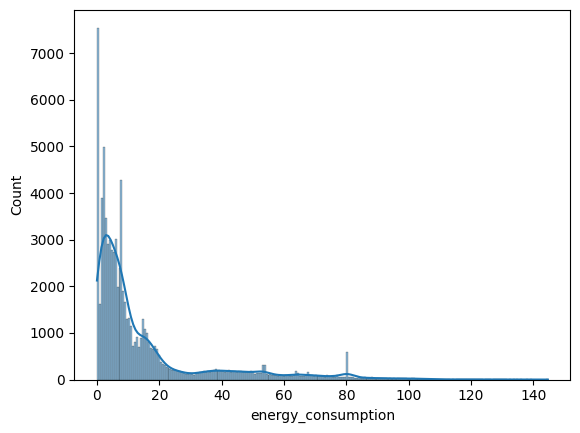

In [9]:
sns.histplot(df["energy_consumption"],kde=True)

In [10]:
Q1 = df["energy_consumption"].quantile(0.25)
Q3 = df["energy_consumption"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-17.500249999999998, 36.61775)

<Axes: ylabel='energy_consumption'>

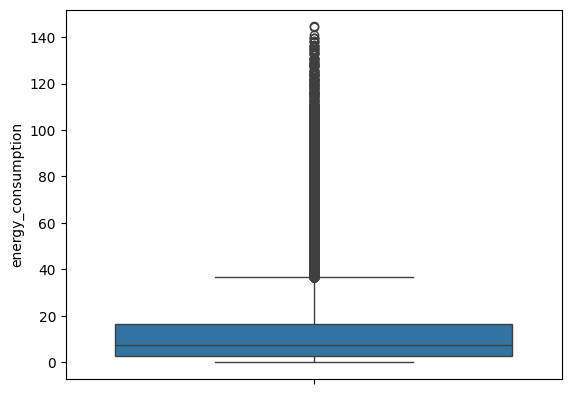

In [11]:
sns.boxplot(df["energy_consumption"])

In [12]:
## we donot want to change any values because the energy consumption of that level is acceptable.

## Air Temperature

<Axes: xlabel='air_temperature', ylabel='Count'>

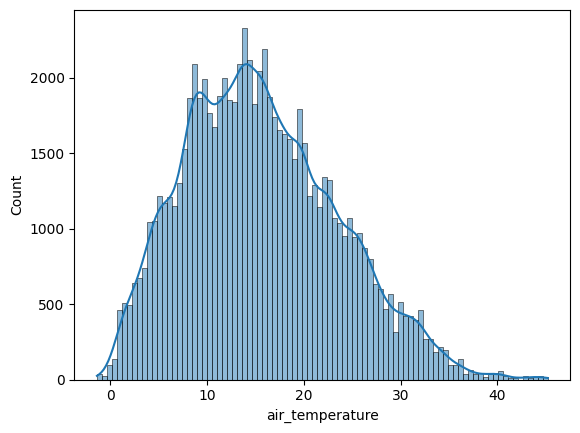

In [13]:
sns.histplot(df["air_temperature"],kde=True)

In [14]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["air_temperature"])
std=np.std(df["air_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-8.036129361003594, 39.210402084131374)

<Axes: ylabel='air_temperature'>

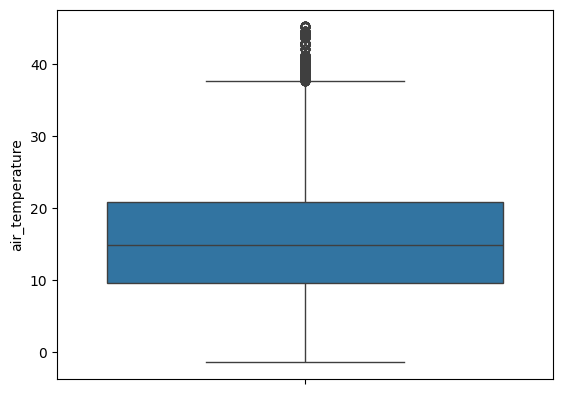

In [15]:
sns.boxplot(df["air_temperature"])

In [16]:
## we donot want to change any values because air temperature of that level is acceptable.

### Apparent_temperature

<Axes: xlabel='apparent_temperature', ylabel='Count'>

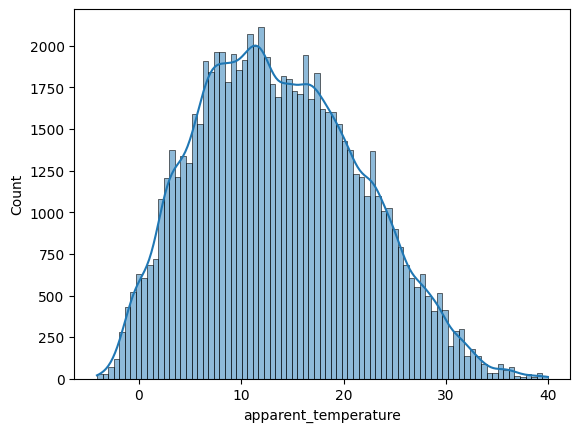

In [17]:
sns.histplot(df["apparent_temperature"],kde=True)

In [18]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["apparent_temperature"])
std=np.std(df["apparent_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-10.034817386162343, 37.619762536054054)

<Axes: ylabel='apparent_temperature'>

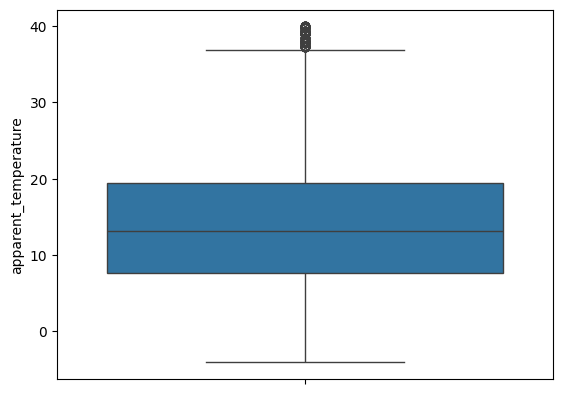

In [19]:
sns.boxplot(df["apparent_temperature"])

In [20]:
## we donot want to change any values because the apparent temperature of that level is acceptable.

### dew point Temperature

<Axes: xlabel='dew_point_temperature', ylabel='Count'>

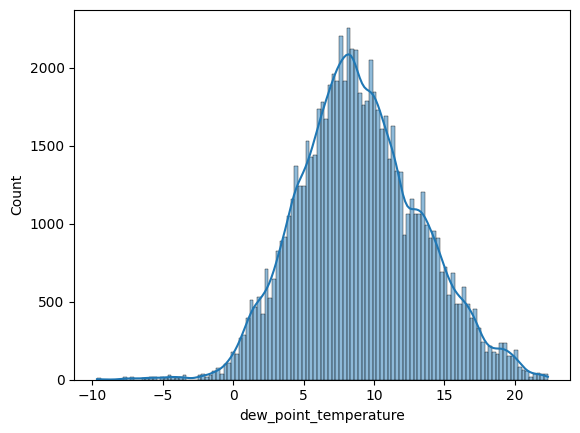

In [21]:
sns.histplot(df["dew_point_temperature"],kde=True)

In [22]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["dew_point_temperature"])
std=np.std(df["dew_point_temperature"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)
lower_bound,upper_bound

(-3.953482016831204, 21.9771981914579)

<Axes: ylabel='dew_point_temperature'>

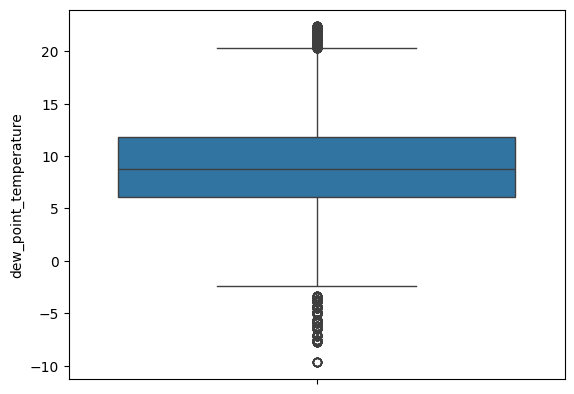

In [23]:
sns.boxplot(df["dew_point_temperature"])

In [24]:
## we donot want to change any values because the dew point temperature of that level is acceptable

### Relative_humidity

<Axes: xlabel='relative_humidity', ylabel='Count'>

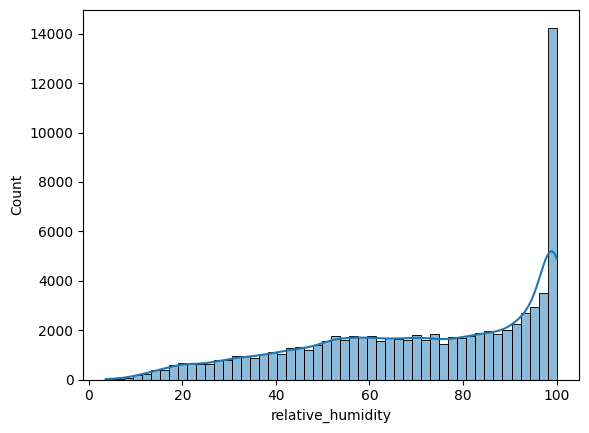

In [25]:
sns.histplot(df["relative_humidity"],kde=True)

In [26]:
## histogram shows it is not normaly distributed,so we use IQR for outliers
Q1 = df["relative_humidity"].quantile(0.25)
Q3 = df["relative_humidity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-9.925049999999985, 157.74174999999997)

<Axes: ylabel='relative_humidity'>

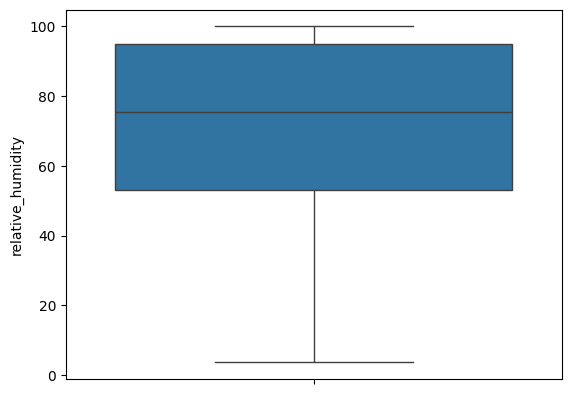

In [27]:
sns.boxplot(df["relative_humidity"])

In [28]:
## we donot want to change any values because the relative humidity of that level is acceptable

### wind speed

<Axes: xlabel='wind_speed', ylabel='Count'>

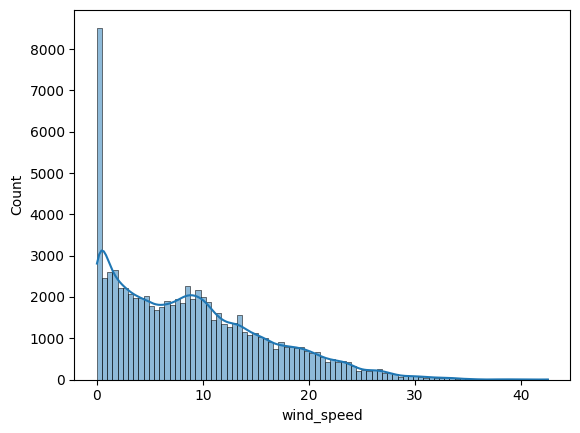

In [29]:
sns.histplot(df["wind_speed"],kde=True)

In [30]:
## histogram shows it is not normaly distributed so,we use IQR for outliers
Q1 = df["wind_speed"].quantile(0.25)
Q3 = df["wind_speed"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-13.165, 29.275)

<Axes: ylabel='wind_speed'>

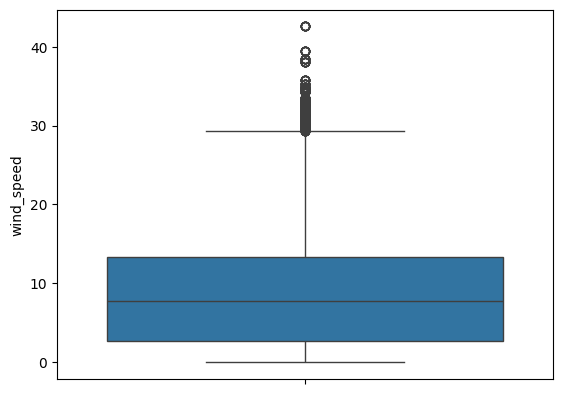

In [31]:
sns.boxplot(df["wind_speed"])

In [32]:
## we donot want to change any values because the wind speed of that level is acceptable

### wind direction

<Axes: xlabel='wind_direction', ylabel='Count'>

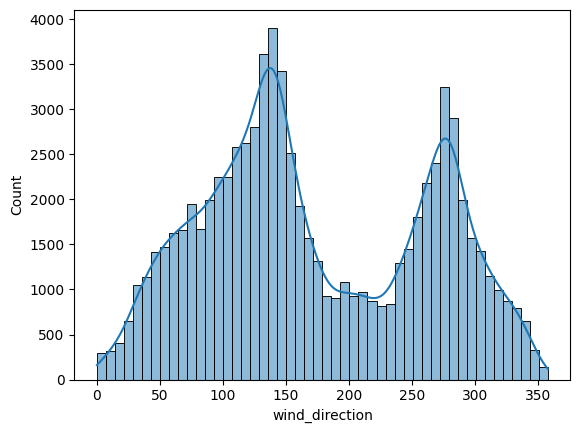

In [33]:
sns.histplot(df["wind_direction"],kde=True)

In [34]:
## histogram shows it is normaly distributes so,we use mean and standard deviation for outliers
mean=np.mean(df["wind_direction"])
std=np.std(df["wind_direction"])
lower_bound=mean-(3*std)
upper_bound=mean+(3*std)

In [35]:
lower_bound,upper_bound

(-89.87952472904146, 437.17344304660674)

<Axes: ylabel='wind_direction'>

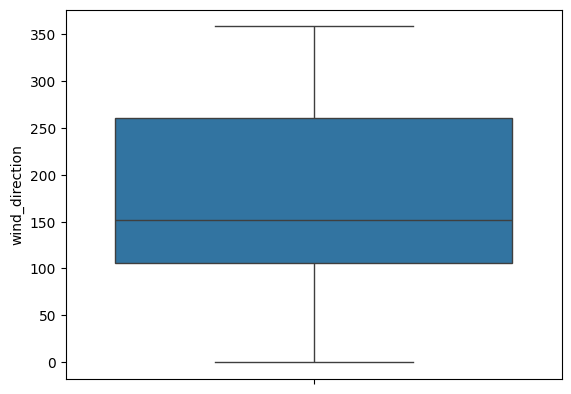

In [36]:
sns.boxplot(df["wind_direction"])

In [37]:
## we donot want to change any values because the wind direction of that level is acceptable

## Converting a Categorical variable to numerical variable

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
df.describe(include="O")

,timestamp
count,79056
unique,8784
top,2020-01-01 00:00:00
freq,9


In [86]:
df["building_category"]=le.fit_transform(df["building_category"])
df["season"]=le.fit_transform(df["season"])

### checking for null values

In [41]:
df.isnull().sum()

timestamp                 0
energy_consumption        0
building_id               0
apparent_temperature     99
air_temperature          99
dew_point_temperature    99
relative_humidity        99
wind_speed               99
wind_direction           99
month                     0
day                       0
hour                      0
weekday                   0
building_category         0
is_weekend                0
season                    0
is_holiday                0
dtype: int64

In [42]:
df["air_temperature"]=df["air_temperature"].fillna(df["air_temperature"].mean())
df["apparent_temperature"]=df["apparent_temperature"].fillna(df["apparent_temperature"].mean())
df["wind_speed"]=df["wind_speed"].fillna(df["wind_speed"].mean())
df["dew_point_temperature"]=df["dew_point_temperature"].fillna(df["dew_point_temperature"].mean())
df["relative_humidity"]=df["relative_humidity"].fillna(df["relative_humidity"].mean())
df["wind_direction"]=df["wind_direction"].fillna(df["wind_direction"].mean())

In [43]:
df.isnull().sum()

timestamp                0
energy_consumption       0
building_id              0
apparent_temperature     0
air_temperature          0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
month                    0
day                      0
hour                     0
weekday                  0
building_category        0
is_weekend               0
season                   0
is_holiday               0
dtype: int64

# feature_selection

<Axes: >

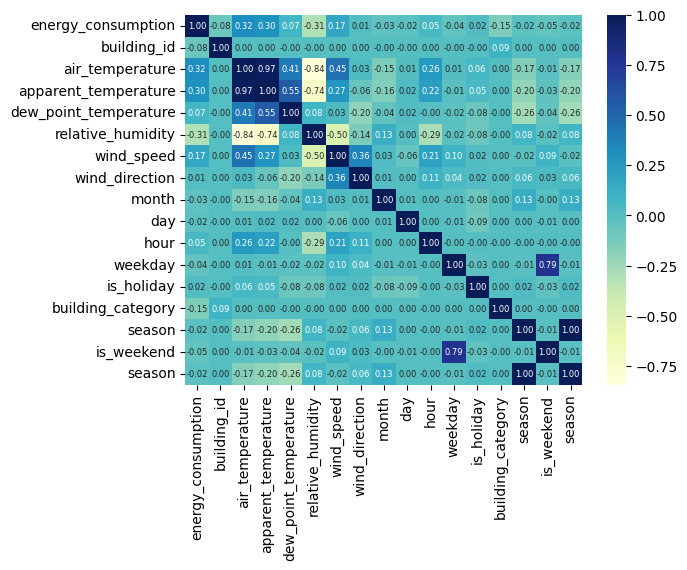

In [44]:
sns.heatmap(df[['energy_consumption', 'building_id', 'air_temperature','apparent_temperature', 'dew_point_temperature', 
   'relative_humidity','wind_speed', 'wind_direction', 'month', 'day', 'hour','weekday', 'is_holiday',
   'building_category','season','is_weekend','season']].corr(),annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size":6 })

In [45]:
x=df.drop(["air_temperature","energy_consumption","timestamp"],axis=1)
y=df[["energy_consumption"]]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
##droping the air temperature also because the air temperature and apparent tempareation correlation is high

# random forest regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [50]:
rf_regressor.fit(x_train, y_train)

c:\workspace\smart energy\energy\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [51]:
y_predict=rf_regressor.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,y_predict)

0.9308863420342066

# Extra Trees Regressor

In [54]:
from sklearn.ensemble import ExtraTreesRegressor

In [55]:
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100, random_state=0)
extra_trees_regressor.fit(x_train, y_train)

c:\workspace\smart energy\energy\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor(random_state=0)

In [56]:
y_pred = extra_trees_regressor.predict(x_test)

In [57]:
y_train_pred = extra_trees_regressor.predict(x_train)

In [58]:
r2_score(y_test,y_pred)

0.9408383767832668

In [59]:
r2_score(y_train,y_train_pred)

1.0

# Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [62]:
gb_regressor.fit(x_train, y_train)

c:\workspace\smart energy\energy\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [63]:
y_pred_grad = gb_regressor.predict(x_test)

In [64]:
r2_score(y_test,y_pred_grad)

0.7302183741910949

In [65]:
trained_df = x_train.merge(y_train, left_index=True, right_index=True, how='inner')

In [66]:
trained_df["energy_consumption_pred"]=y_train_pred

In [67]:
tested_df = x_test.merge(y_test, left_index=True, right_index=True, how='inner')

In [68]:
tested_df["energy_consumption_pred"]=y_pred

In [69]:
tested_df.columns

Index(['building_id', 'apparent_temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction', 'month', 'day',
       'hour', 'weekday', 'building_category', 'is_weekend', 'season',
       'is_holiday', 'energy_consumption', 'energy_consumption_pred'],
      dtype='object')

In [70]:
tested_df.head()

,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday,energy_consumption,energy_consumption_pred
38605,5.0,12.2800,6.1800,54.7000,10.6867,164.7333,5,24,13,6,2,1,0,0.0,2.636,2.59787
69900,8.0,30.9150,16.4850,40.8667,13.5767,81.3667,12,16,12,2,3,0,2,0.0,10.118,9.17530
61831,8.0,22.1517,12.3750,52.5833,5.9333,148.8000,1,15,7,2,3,0,2,0.0,3.915,2.69057
22374,3.0,2.9333,4.2150,100.0000,0.0000,101.3000,7,19,6,6,4,1,3,0.0,1.983,2.02117
57151,7.0,-1.2750,0.8367,99.6833,1.4467,100.9667,7,4,7,5,1,1,3,0.0,0.000,0.00000


## future prediction

In [71]:
future_forecasting=pd.read_csv(r"C:\workspace\smart energy\usecase\energy_consumtion_prediction\prediction_machinelearning_dataset\energy_consumption_cleaned_future_data.csv")

In [72]:
future_forecasting[future_forecasting.isnull().any(axis=1)]

,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday


In [73]:
future_forecasting.head()

,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday
0,1.0,22.6933,14.2583,57.1167,9.6333,130.6167,1,1,0,4,0,0,0,1.0
1,1.0,21.5667,13.8483,56.5333,13.2550,59.6000,1,1,1,4,0,0,0,1.0
2,1.0,21.2267,15.0000,63.3333,13.7200,36.4167,1,1,2,4,0,0,0,1.0
3,1.0,22.1600,15.0117,65.2333,6.5267,52.1833,1,1,3,4,0,0,0,1.0
4,1.0,22.0550,15.2733,68.7667,4.7300,40.5000,1,1,4,4,0,0,0,1.0


In [74]:
future_forecasting.isnull().sum()

building_id              0
apparent_temperature     0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
month                    0
day                      0
hour                     0
weekday                  0
building_category        0
is_weekend               0
season                   0
is_holiday               0
dtype: int64

In [75]:
x.columns

Index(['building_id', 'apparent_temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction', 'month', 'day',
       'hour', 'weekday', 'building_category', 'is_weekend', 'season',
       'is_holiday'],
      dtype='object')

In [76]:
future_forecasting.columns

Index(['building_id', 'apparent_temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction', 'month', 'day',
       'hour', 'weekday', 'building_category', 'is_weekend', 'season',
       'is_holiday'],
      dtype='object')

In [77]:
future_forecasting["energy_consumption_prediction"]=extra_trees_regressor.predict(future_forecasting)

In [78]:
future_forecasting.loc[:,"year"]=2021
future_forecasting.loc[:,"timestamp"]=pd.to_datetime(future_forecasting[["year","month","day","hour"]])

In [79]:
future_forecasting.head()

,building_id,apparent_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,month,day,hour,weekday,building_category,is_weekend,season,is_holiday,energy_consumption_prediction,year,timestamp
0,1.0,22.6933,14.2583,57.1167,9.6333,130.6167,1,1,0,4,0,0,0,1.0,11.848167,2021,2021-01-01 00:00:00
1,1.0,21.5667,13.8483,56.5333,13.2550,59.6000,1,1,1,4,0,0,0,1.0,8.902531,2021,2021-01-01 01:00:00
2,1.0,21.2267,15.0000,63.3333,13.7200,36.4167,1,1,2,4,0,0,0,1.0,8.328656,2021,2021-01-01 02:00:00
3,1.0,22.1600,15.0117,65.2333,6.5267,52.1833,1,1,3,4,0,0,0,1.0,8.038478,2021,2021-01-01 03:00:00
4,1.0,22.0550,15.2733,68.7667,4.7300,40.5000,1,1,4,4,0,0,0,1.0,10.430032,2021,2021-01-01 04:00:00


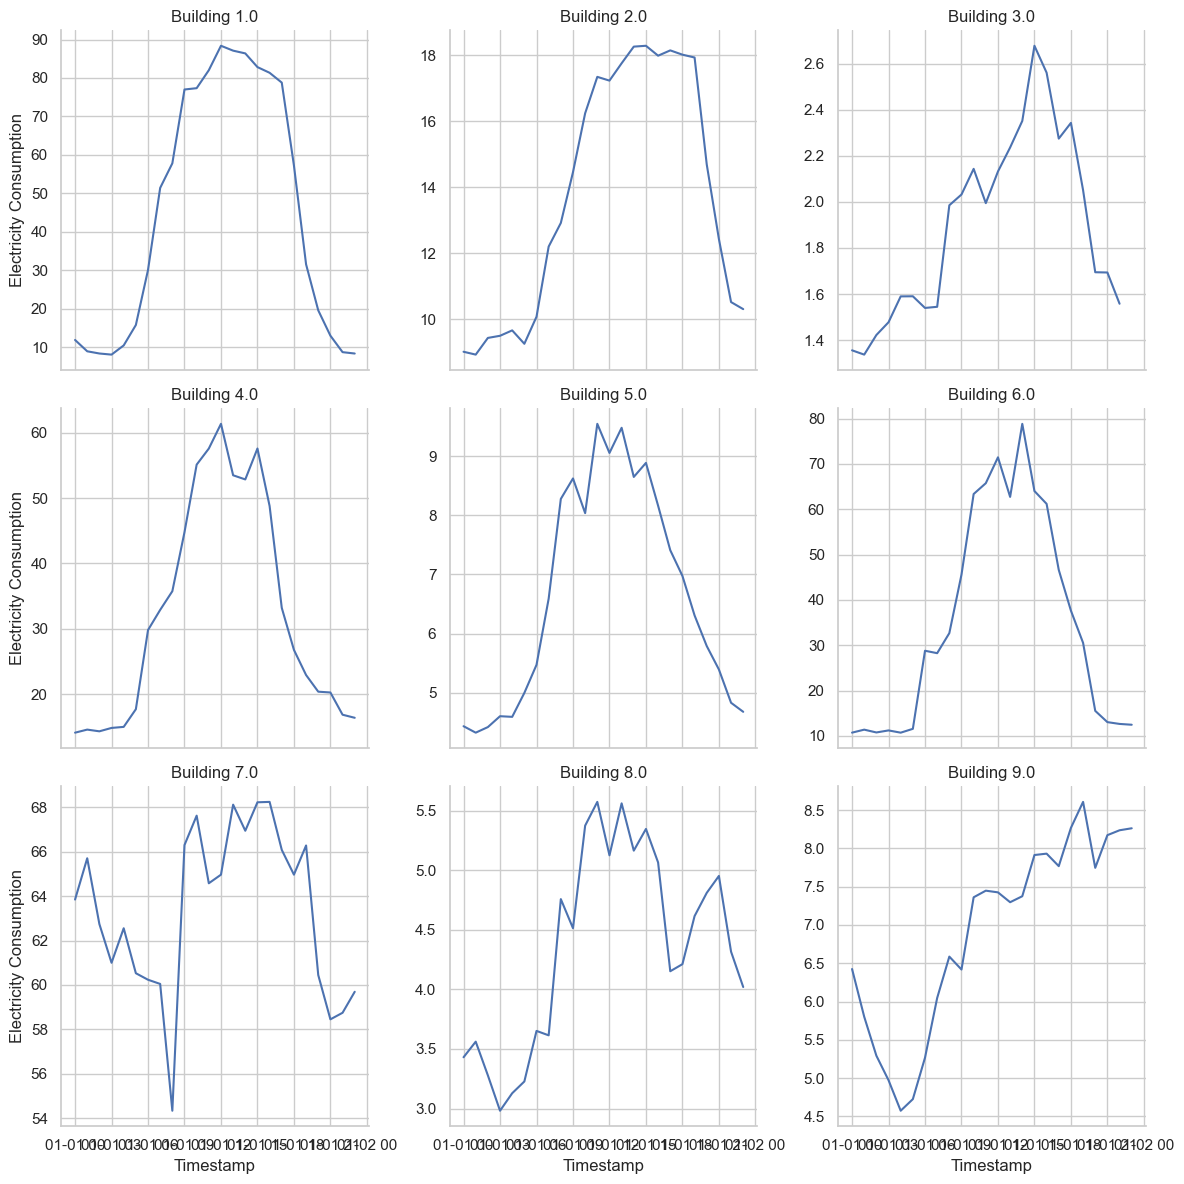

In [80]:
sns.set(style="whitegrid")
g = sns.FacetGrid(future_forecasting, col="building_id", col_wrap=3, height=4, sharey=False)

g.map(sns.lineplot, "timestamp", "energy_consumption_prediction")
g.set_titles("Building {col_name}")
g.set_axis_labels("Timestamp", "Electricity Consumption")

plt.tight_layout()

In [81]:
future_forecasting.to_csv(r"C:\workspace\smart energy\usecase\Anomaly_energy_consumption\Anomaly_Machine_Learning_dataset\anomaly_testing_input.csv",index=False)

In [83]:
from joblib import dump
dump(extra_trees_regressor,"C:\workspace\smart energy\saved project\energy_consumption.joblib")

['C:\\workspace\\smart energy\\saved project\\energy_consumption.joblib']

In [87]:
objects_to_serialize = (df["building_category"], df["season"])
dump(objects_to_serialize, 'C:\workspace\smart energy\saved project\multiple_objects.joblib')


['C:\\workspace\\smart energy\\saved project\\multiple_objects.joblib']

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv(r"C:\workspace\smart energy\usecase\energy_consumtion_prediction\prediction_machinelearning_dataset\energy_consumption_future_data.csv")

In [7]:
df=df.drop(["timestamp","energy_consumption","air_temperature"],axis=1)

In [8]:
df.to_json(orient="records")

'[{"building_id":1.0,"apparent_temperature":22.6933,"dew_point_temperature":14.2583,"relative_humidity":57.1167,"wind_speed":9.6333,"wind_direction":130.6167,"month":1,"day":1,"hour":0,"weekday":4,"building_category":"library","is_weekend":0,"season":"summer","is_holiday":1.0},{"building_id":1.0,"apparent_temperature":21.5667,"dew_point_temperature":13.8483,"relative_humidity":56.5333,"wind_speed":13.255,"wind_direction":59.6,"month":1,"day":1,"hour":1,"weekday":4,"building_category":"library","is_weekend":0,"season":"summer","is_holiday":1.0},{"building_id":1.0,"apparent_temperature":21.2267,"dew_point_temperature":15.0,"relative_humidity":63.3333,"wind_speed":13.72,"wind_direction":36.4167,"month":1,"day":1,"hour":2,"weekday":4,"building_category":"library","is_weekend":0,"season":"summer","is_holiday":1.0},{"building_id":1.0,"apparent_temperature":22.16,"dew_point_temperature":15.0117,"relative_humidity":65.2333,"wind_speed":6.5267,"wind_direction":52.1833,"month":1,"day":1,"hour":3

In [9]:
x_test.columns

NameError: name 'x_test' is not defined